#📌 Extracción

In [ ]:
import pandas as pd # Manejar biblioteca pandas
import requests # Manejar biblioteca requests

url = 'https://raw.githubusercontent.com/vicdas/DataScienceChallengeTelecomX/refs/heads/main/TelecomX_Data.json'

response = requests.get(url)
data = response.json()

In [ ]:
data

[{'customerID': '0002-ORFBO',
  'Churn': 'No',
  'customer': {'gender': 'Female',
   'SeniorCitizen': 0,
   'Partner': 'Yes',
   'Dependents': 'Yes',
   'tenure': 9},
  'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'},
  'internet': {'InternetService': 'DSL',
   'OnlineSecurity': 'No',
   'OnlineBackup': 'Yes',
   'DeviceProtection': 'No',
   'TechSupport': 'Yes',
   'StreamingTV': 'Yes',
   'StreamingMovies': 'No'},
  'account': {'Contract': 'One year',
   'PaperlessBilling': 'Yes',
   'PaymentMethod': 'Mailed check',
   'Charges': {'Monthly': 65.6, 'Total': '593.3'}}},
 {'customerID': '0003-MKNFE',
  'Churn': 'No',
  'customer': {'gender': 'Male',
   'SeniorCitizen': 0,
   'Partner': 'No',
   'Dependents': 'No',
   'tenure': 9},
  'phone': {'PhoneService': 'Yes', 'MultipleLines': 'Yes'},
  'internet': {'InternetService': 'DSL',
   'OnlineSecurity': 'No',
   'OnlineBackup': 'No',
   'DeviceProtection': 'No',
   'TechSupport': 'No',
   'StreamingTV': 'No',
   'StreamingMovies': 

In [ ]:
# Normalizar (aplanar) estructuras anidadas
datos_telecomx = pd.json_normalize(data)
datos_telecomx.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
type(datos_telecomx)

pandas.core.frame.DataFrame

#🔧 Transformación

In [ ]:
datos_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
datos_telecomx.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [ ]:
import numpy as np

# Reemplazar espacios con NaN antes de convertir a float
datos_telecomx['account.Charges.Total'] = datos_telecomx['account.Charges.Total'].replace(' ', np.nan)

# Usando pd.to_numeric con errors='coerce' para manejar otro valor no numérico
datos_telecomx['account.Charges.Total'] = pd.to_numeric(datos_telecomx['account.Charges.Total'], errors='coerce')

# Ahora a convertirlo en un float64
datos_telecomx['account.Charges.Total'] = datos_telecomx['account.Charges.Total'].astype(np.float64)

In [ ]:
datos_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
datos_telecomx.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [ ]:
datos_telecomx.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


### Paso 1: Verificar valores ausentes

In [ ]:
# Cantidad de valores nulos por columna
print(datos_telecomx.isnull().sum())

customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [ ]:
# Crear una tabla con el conteo y porcentaje de valores nulos
missing_data = datos_telecomx.isnull().sum().to_frame(name='Nulos')
missing_data['% Nulos'] = 100 * missing_data['Nulos'] / len(datos_telecomx)
missing_data = missing_data[missing_data['Nulos'] > 0].sort_values(by='Nulos', ascending=False)

# Mostrar la tabla
print(missing_data)

                       Nulos   % Nulos
account.Charges.Total     11  0.151369


In [ ]:
# Usar la media para llenar con valores los datos faltantes
datos_telecomx['account.Charges.Total'] = datos_telecomx['account.Charges.Total'].fillna(datos_telecomx['account.Charges.Total'].mean())

### Paso 2: Eliminar duplicados

In [ ]:
# Mostrar los valores duplicados en el Data frame
print(f"Duplicados antes: {datos_telecomx.duplicated().sum()}")
# Eliminarlos completamente del Data frame
datos_telecomx = datos_telecomx.drop_duplicates()

Duplicados antes: 0


### Paso 3: Revisar y convertir tipos de datos

In [ ]:
print(datos_telecomx.dtypes)

# Convertir columnas numéricas mal cargadas como string
# datos_telecomx['account.Charges.Total'] = pd.to_numeric(datos_telecomx['account.Charges.Total'], errors='coerce')
# datos_telecomx['account.Charges.Monthly'] = pd.to_numeric(datos_telecomx['account.Charges.Monthly'], errors='coerce')

customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total        float64
dtype: object


###  Paso 4: Limpieza de texto en columnas categóricas

In [ ]:
# Lista de columnas del Data frame
cat_cols = ['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService',
            'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup',
            'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
            'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']

# Recorrer cada una de las columnas de texto y poner la información en minúsculas
for col in cat_cols:
    datos_telecomx[col] = datos_telecomx[col].astype(str).str.strip().str.lower()

Paso 5: Verificar categorías únicas (inconsistencias)

In [ ]:
# Recorrer cada una de las columnas de texto y validar si las categorias son únicas
for col in cat_cols:
    print(f"{col}: {datos_telecomx[col].unique()}")

Churn: ['no' 'yes' '']
customer.gender: ['female' 'male']
customer.Partner: ['yes' 'no']
customer.Dependents: ['yes' 'no']
phone.PhoneService: ['yes' 'no']
phone.MultipleLines: ['no' 'yes' 'no phone service']
internet.InternetService: ['dsl' 'fiber optic' 'no']
internet.OnlineSecurity: ['no' 'yes' 'no internet service']
internet.OnlineBackup: ['yes' 'no' 'no internet service']
internet.DeviceProtection: ['no' 'yes' 'no internet service']
internet.TechSupport: ['yes' 'no' 'no internet service']
internet.StreamingTV: ['yes' 'no' 'no internet service']
internet.StreamingMovies: ['no' 'yes' 'no internet service']
account.Contract: ['one year' 'month-to-month' 'two year']
account.PaperlessBilling: ['yes' 'no']
account.PaymentMethod: ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']


In [ ]:
# Modicficar valores de la columna Chrun vacias usando la moda
datos_telecomx['Churn'] = datos_telecomx['Churn'].fillna(datos_telecomx['Churn'].mode()[0])

### Paso 6: Normalizar fechas (si hubiera fechas)

In [ ]:
# Suponiendo que hay una columna 'FechaAlta'
# df['FechaAlta'] = pd.to_datetime(df['FechaAlta'])
# df['FechaAlta'] = df['FechaAlta'].dt.normalize()

### Agregar la columna de cuentas diarias

In [ ]:
# Creación de la columna Cuentas_Diarias en el Data frame
datos_telecomx['Cuentas_Diarias'] = datos_telecomx['account.Charges.Monthly'] / 30

# Mostrar el Data frame con la nueva columna Cuentas_Diarias
print(datos_telecomx[['account.Charges.Monthly', 'Cuentas_Diarias']].head())

   account.Charges.Monthly  Cuentas_Diarias
0                     65.6         2.186667
1                     59.9         1.996667
2                     73.9         2.463333
3                     98.0         3.266667
4                     83.9         2.796667


### Estandarización y transformación de datos

####  1. Convertir texto a binario (Sí/No → 1/0)

In [ ]:
binarias = ['Churn', 'customer.Partner', 'customer.Dependents',
            'phone.PhoneService', 'account.PaperlessBilling']

for col in binarias:
    datos_telecomx[col] = datos_telecomx[col].map({'yes': 1, 'no': 0})

#### 2. Reemplazar valores como “no internet service” por “no”

In [ ]:
cols_internet = ['internet.OnlineSecurity', 'internet.OnlineBackup',
                 'internet.DeviceProtection', 'internet.TechSupport',
                 'internet.StreamingTV', 'internet.StreamingMovies']

for col in cols_internet:
    datos_telecomx[col] = datos_telecomx[col].replace('no internet service', 'no')

#### 3. Estandarizar formatos (minúsculas, sin espacios)

In [ ]:
for col in datos_telecomx.select_dtypes(include='object').columns:
    datos_telecomx[col] = datos_telecomx[col].str.strip().str.lower()

#### Renombrar columnas para claridad (opcional)

In [37]:
datos_telecomx.rename(columns={
    'account.Charges.Monthly': 'gasto_mensual',
    'account.Charges.Total': 'gasto_total',
    'Cuentas_Diarias': 'gasto_diario'
}, inplace=True)

In [38]:
datos_telecomx.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,gasto_mensual,gasto_total,gasto_diario
0,0002-orfbo,0.0,female,0,1,1,9,1,no,dsl,...,no,yes,yes,no,one year,1,mailed check,65.6,593.30,2.186667
1,0003-mknfe,0.0,male,0,0,0,9,1,yes,dsl,...,no,no,no,yes,month-to-month,0,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,1.0,male,0,0,0,4,1,no,fiber optic,...,yes,no,no,no,month-to-month,1,electronic check,73.9,280.85,2.463333
3,0011-igkff,1.0,male,1,1,0,13,1,no,fiber optic,...,yes,no,yes,yes,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,0013-exchz,1.0,female,1,1,0,3,1,no,fiber optic,...,no,yes,yes,no,month-to-month,1,mailed check,83.9,267.40,2.796667


#📊 Carga y análisis

## **Análisis descriptivo**

### 1. Estadísticas básicas de columnas numéricas

In [45]:
datos_telecomx.describe()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,gasto_mensual,gasto_total,gasto_diario
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2280.634213,2.157337
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2266.915104,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,401.400000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1394.550000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


### 2. Estadísticas específicas por columna

In [40]:
datos_telecomx['gasto_mensual'].mean()            # Media

np.float64(64.72009770194028)

In [41]:
datos_telecomx['gasto_mensual'].median()         # Mediana

70.3

In [42]:
datos_telecomx['gasto_mensual'].std()            # Desviación estándar

30.12957188566699

In [43]:
datos_telecomx['gasto_mensual'].min()            # Mínimo

18.25

In [44]:
datos_telecomx['gasto_mensual'].max()            # Máximo

118.75

### 3. Distribución de variables categóricas

In [47]:
datos_telecomx['Churn'].value_counts(normalize=True) * 100  # Porcentajes de clientes que se fueron o no

,proportion
Churn,
0.0,73.463013
1.0,26.536987


In [48]:
datos_telecomx['account.Contract'].value_counts()

,count
account.Contract,
month-to-month,4005
two year,1743
one year,1519


### 4. Correlación entre variables numéricas

In [49]:
datos_telecomx.corr(numeric_only=True)

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,gasto_mensual,gasto_total,gasto_diario
Churn,1.000000,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,-0.199427,0.193356
customer.SeniorCitizen,0.150889,1.000000,0.022970,-0.212952,0.018187,0.010060,0.157734,0.220388,0.103484,0.220388
customer.Partner,-0.150448,0.022970,1.000000,0.448900,0.377551,0.018828,-0.011201,0.097122,0.316668,0.097122
customer.Dependents,-0.164221,-0.212952,0.448900,1.000000,0.159892,-0.003863,-0.111752,-0.115832,0.063847,-0.115832
customer.tenure,-0.352229,0.018187,0.377551,0.159892,1.000000,0.010205,0.007949,0.247982,0.824034,0.247982
phone.PhoneService,0.011942,0.010060,0.018828,-0.003863,0.010205,1.000000,0.013624,0.246709,0.113638,0.246709
account.PaperlessBilling,0.191825,0.157734,-0.011201,-0.111752,0.007949,0.013624,1.000000,0.353714,0.159152,0.353714
gasto_mensual,0.193356,0.220388,0.097122,-0.115832,0.247982,0.246709,0.353714,1.000000,0.651532,1.000000
gasto_total,-0.199427,0.103484,0.316668,0.063847,0.824034,0.113638,0.159152,0.651532,1.000000,0.651532
gasto_diario,0.193356,0.220388,0.097122,-0.115832,0.247982,0.246709,0.353714,1.000000,0.651532,1.000000


### 5. Resumen general de todas las columnas

In [50]:
datos_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   float64
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   int64  
 5   customer.Dependents        7267 non-null   int64  
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   int64  
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

## **Distribución de evasión**

### 1. Gráfico de barras con matplotlib y seaborn

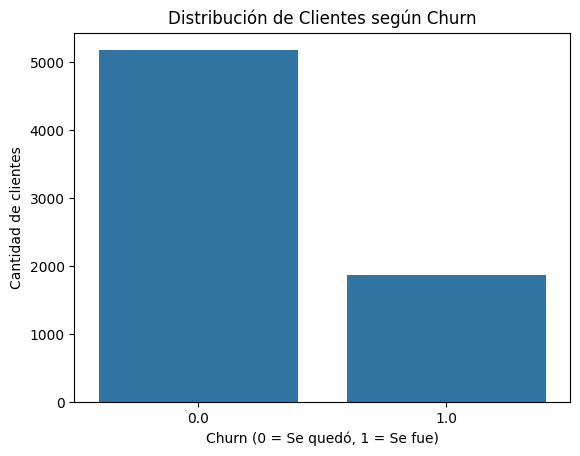

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conteo de churn
sns.countplot(x='Churn', data=datos_telecomx)
plt.title('Distribución de Clientes según Churn')
plt.xlabel('Churn (0 = Se quedó, 1 = Se fue)')
plt.ylabel('Cantidad de clientes')
plt.show()

### 2. Gráfico de pastel (pie chart)

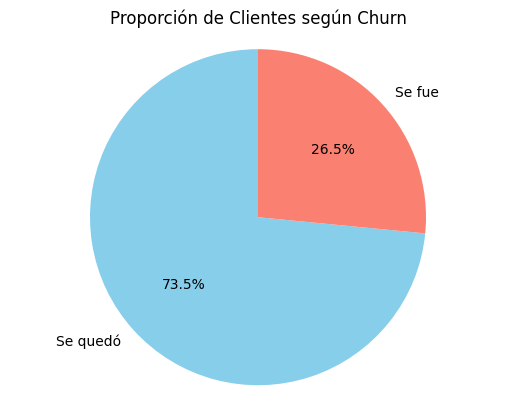

In [52]:
churn_counts = datos_telecomx['Churn'].value_counts()
labels = ['Se quedó', 'Se fue']
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Proporción de Clientes según Churn')
plt.axis('equal')  # Círculo perfecto
plt.show()

## **Recuento de evasión por variables categóricas**

###  1. Distribución de Churn por género

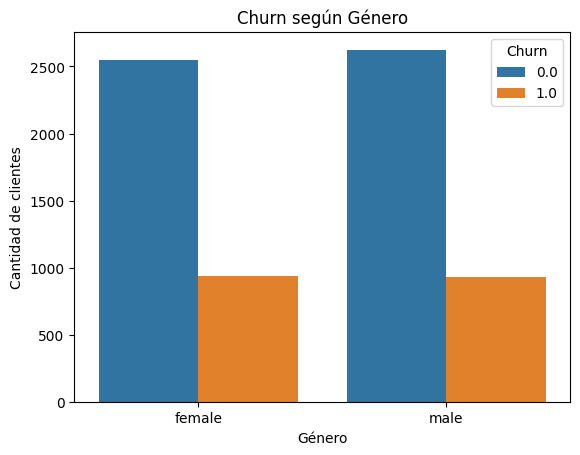

In [54]:
sns.countplot(data=datos_telecomx, x='customer.gender', hue='Churn')
plt.title('Churn según Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn')
plt.show()

### 2. Churn por tipo de contrato

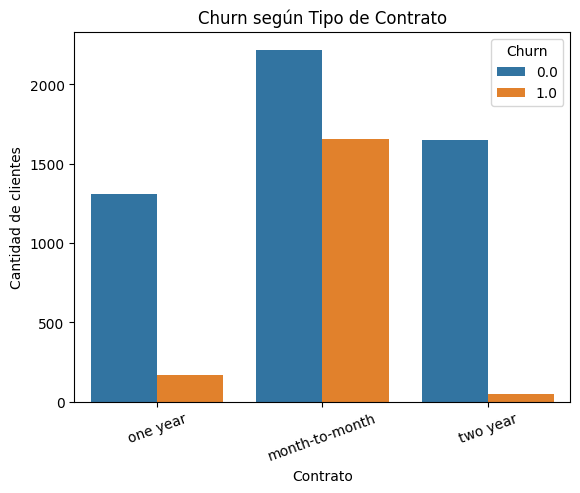

In [56]:
sns.countplot(data=datos_telecomx, x='account.Contract', hue='Churn')
plt.title('Churn según Tipo de Contrato')
plt.xlabel('Contrato')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn')
plt.xticks(rotation=20)
plt.show()

### 3. Churn por método de pago

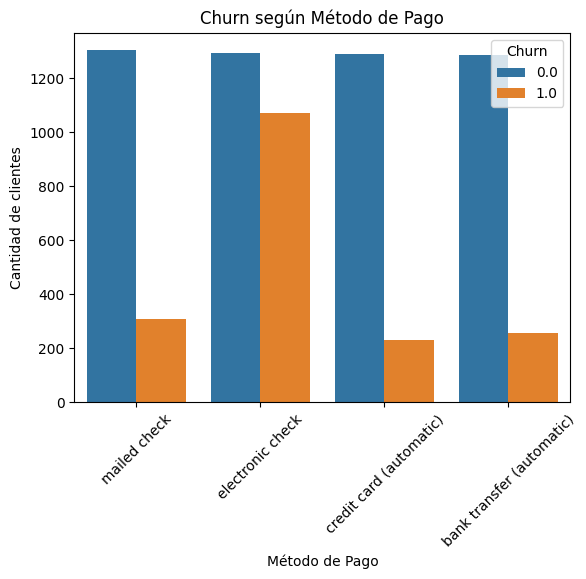

In [57]:
sns.countplot(data=datos_telecomx, x='account.PaymentMethod', hue='Churn')
plt.title('Churn según Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn')
plt.xticks(rotation=45)
plt.show()

### 4. Proporciones (tabla) por categoría

In [59]:
pd.crosstab(datos_telecomx['account.Contract'], datos_telecomx['Churn'], normalize='index') * 100

Churn,0.0,1.0
account.Contract,,
month-to-month,57.290323,42.709677
one year,88.730482,11.269518
two year,97.168142,2.831858


## Conteo de evasión por variables numéricas

### 1. Distribución del gasto total según Churn

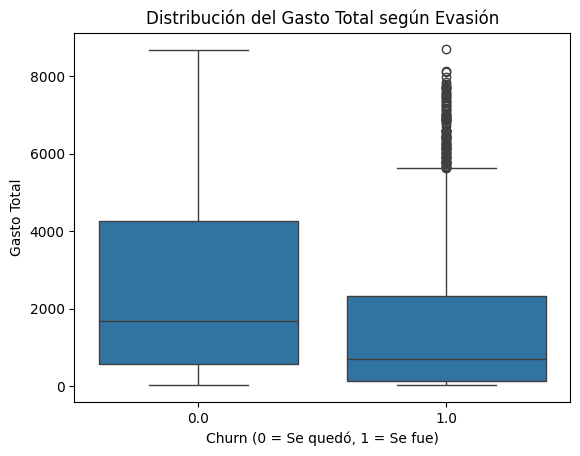

In [60]:
sns.boxplot(data=datos_telecomx, x='Churn', y='gasto_total')
plt.title('Distribución del Gasto Total según Evasión')
plt.xlabel('Churn (0 = Se quedó, 1 = Se fue)')
plt.ylabel('Gasto Total')
plt.show()

### 2. Distribución del tiempo de contrato (tenure) por Churn

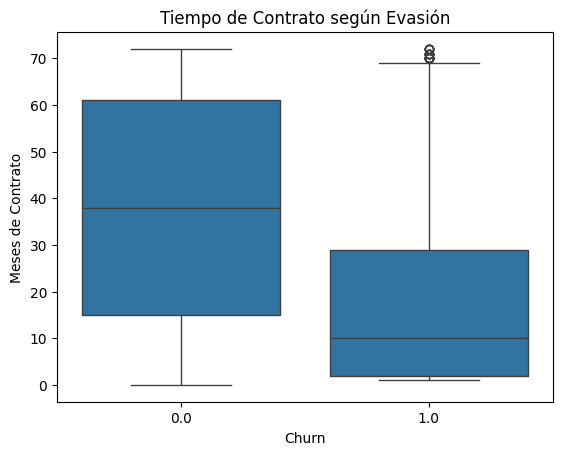

In [64]:
sns.boxplot(data=datos_telecomx, x='Churn', y='customer.tenure')
plt.title('Tiempo de Contrato según Evasión')
plt.xlabel('Churn')
plt.ylabel('Meses de Contrato')
plt.show()

### 3. Histogramas sobrepuestos

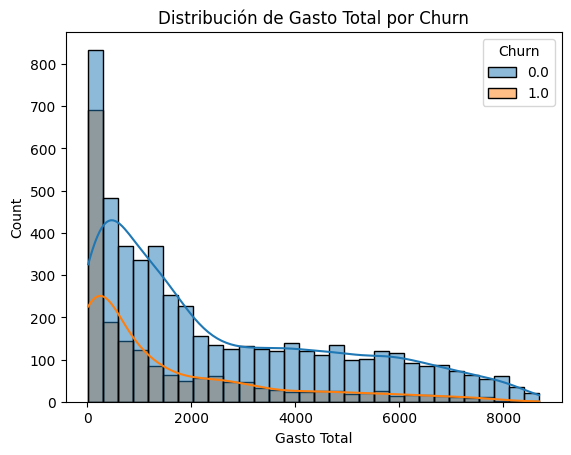

In [66]:
sns.histplot(data=datos_telecomx, x='gasto_total', hue='Churn', bins=30, kde=True)
plt.title('Distribución de Gasto Total por Churn')
plt.xlabel('Gasto Total')
plt.show()

#📄Informe final

## Análisis de Evasión de Clientes